In [1]:
#La hipótesis de este análisis es que los primeros dos pisos de un apartamento se cotizan a precios más bajos.
#Esto se debe a mayor riesgo de robo al estar cerca del nivel de calle.
#Adicionalmente, se espera que entre más alto el piso a partir de un cierto pico, la cotización empiece a bajar.
#Entre más alto está el departamento, más largos serán los tiempos de espera en el ascensor y escaleras.

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

#Datos de Properati
#data = pd.read_csv('/home/martin/Documents/jupyter/datasets/properati-AR-2017-08-01-properties-sell.csv')

#Datos procesados
data = pd.read_csv('datos_procesados.csv',low_memory = False)

In [2]:
#Selecciono datos que me interesan (estado, tipo de propiedad, superficie, precio por m2, y piso)
data2 = data[['state_name','property_type','surface_covered_in_m2','price_per_m2','floor']]

#Elimino NAs
data2.dropna(inplace=True)

#Selecciono sólo los apartamentos 
data3 = data2[data2['property_type']== 'apartment']

#Agrego una columna con el precio de la propiedad
data3['precio_propiedad'] = data3['surface_covered_in_m2']*data3['price_per_m2']

#Separo los datos en Capital Federal y Gran Buenos Aires
dataCF = data3[data3['state_name']== 'Capital Federal']
dataGBA = data3.loc[data3.state_name.str.contains('G.B.A.'),:]

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


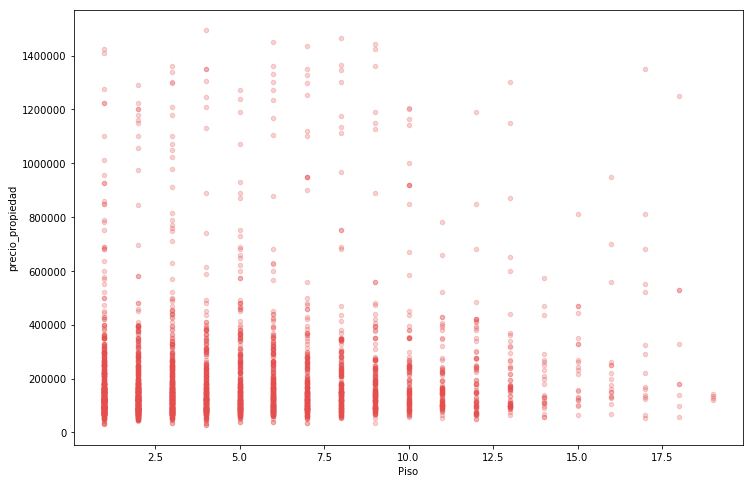

In [3]:
#Hago un scatterplot con el precio de propiedades por piso en Capital Federal

dataCF1 = dataCF[dataCF['precio_propiedad']< 1500000]
dataCF2 = dataCF1[dataCF1['floor']< 20]

dataCF2.plot.scatter('floor', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.9,0.3,0.3)).set_xlabel("Piso")

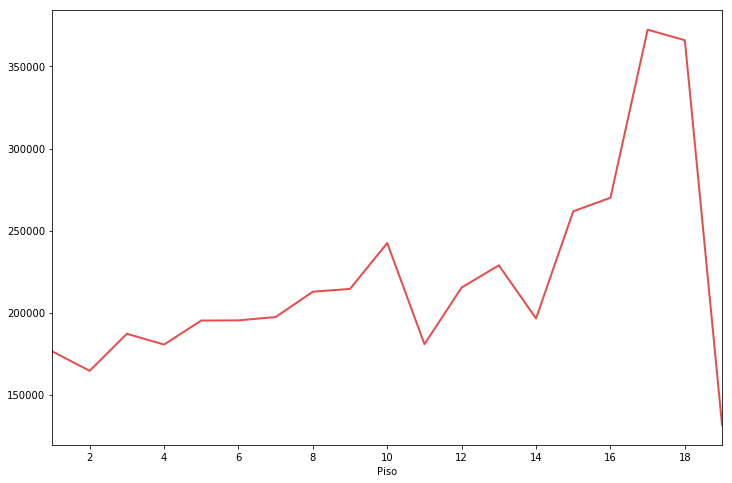

In [4]:
#Grafico el promedio de precio de propiedades por piso en Capital Federal
dataCF2.groupby('floor').mean().loc[:,'precio_propiedad'].plot(linewidth=2,figsize=(12,8),color=(0.9,0.3,0.3)).set_xlabel("Piso")

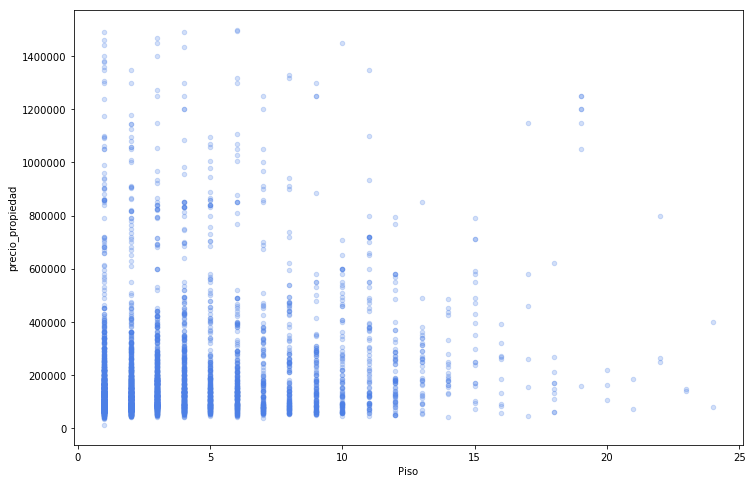

In [5]:
#Hago un scatterplot con el precio de propiedades por piso en Gran Buenos Aires

dataGBA1 = dataGBA[dataGBA['precio_propiedad']< 1500000]
dataGBA2 = dataGBA1[dataGBA1['floor']< 30]

dataGBA2.plot.scatter('floor', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.3,0.5,0.9)).set_xlabel("Piso")

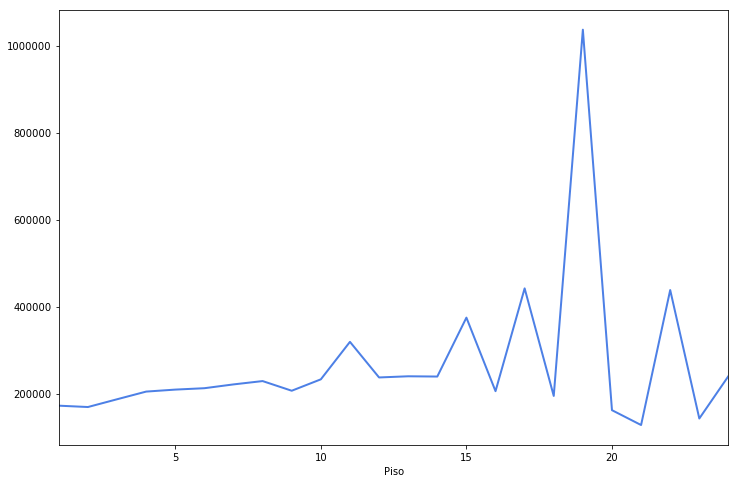

In [6]:
#Grafico el promedio de precio de propiedades por piso en Gran Buenos Aires
dataGBA2.groupby('floor').mean().loc[:,'precio_propiedad'].plot(linewidth=2,figsize=(12,8),color=(0.3,0.5,0.9)).set_xlabel("Piso")

In [ ]:
#Concluimos que tanto para Capital Federal como para Gran Buenos Aires, los primeros pisos se cotizan más barato.
#Después de cierto punto la cotización se vuelve irregular, pero tiende a reducirse.